In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import random

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, f_regression

# data load

In [2]:
base = os.getcwd()
data_path = os.path.join(base, 'data')
submit_path = os.path.join(base, 'submit')

def load_data(name):
    return np.load(os.path.join(data_path, f"{name}.npy"))

def load(name='train'):
    if name == "test" :
        return load_data(name)
    return (load_data('X'), load_data('Y'))

def reshape(data):
    return data.reshape(data.shape[0] * 40 * 40, data.shape[-1])

In [3]:
data = load_data('total')

columns = [f"temp_{i}" for i in range(9)] + \
    ['type', 'GMI_long', 'GMI_lat', 'DPR_long', 'DPR_lat', 'precipitation']

In [4]:
data = pd.DataFrame(data, columns=columns)
print(data.shape)

(122152000, 15)


In [5]:
data = data.drop([i for i, check in enumerate(data['precipitation'] < 0) if check == True])
print(data.shape)

(121608244, 15)


In [19]:
# data = np.array([d for d in random.choices(data, k=1216100)])

# print(data.shape)

# Corr

In [97]:
pd_data.corr()

,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,type,GMI_long,GMI_lat,DPR_long,DPR_lat,precipitation
temp_0,1.000000,0.992209,0.963208,0.970284,0.754079,0.886892,0.927081,0.065217,0.378771,0.892144,-0.628526,0.310089,-0.628527,0.310088,0.022037
temp_1,0.992209,1.000000,0.944043,0.962672,0.709854,0.860691,0.916786,0.004228,0.327989,0.901067,-0.610873,0.361132,-0.610873,0.361130,0.022879
temp_2,0.963208,0.944043,1.000000,0.992999,0.890016,0.962434,0.978553,0.234744,0.562302,0.832530,-0.628379,0.149762,-0.628382,0.149761,0.063539
temp_3,0.970284,0.962672,0.992999,1.000000,0.854169,0.943156,0.981028,0.160431,0.511579,0.853591,-0.618725,0.207136,-0.618726,0.207135,0.066153
temp_4,0.754079,0.709854,0.890016,0.854169,1.000000,0.912546,0.875233,0.555049,0.835098,0.596772,-0.548281,-0.204157,-0.548287,-0.204156,0.061027
temp_5,0.886892,0.860691,0.962434,0.943156,0.912546,1.000000,0.977604,0.408139,0.683140,0.739505,-0.576137,0.073102,-0.576140,0.073102,0.072085
temp_6,0.927081,0.916786,0.978553,0.981028,0.875233,0.977604,1.000000,0.249540,0.590744,0.798241,-0.583926,0.168798,-0.583928,0.168796,0.081425
temp_7,0.065217,0.004228,0.234744,0.160431,0.555049,0.408139,0.249540,1.000000,0.879675,-0.052044,-0.108620,-0.548506,-0.108623,-0.548504,-0.062774
temp_8,0.378771,0.327989,0.562302,0.511579,0.835098,0.683140,0.590744,0.879675,1.000000,0.237899,-0.298316,-0.438790,-0.298320,-0.438789,-0.008456
type,0.892144,0.901067,0.832530,0.853591,0.596772,0.739505,0.798241,-0.052044,0.237899,1.000000,-0.572101,0.373967,-0.572101,0.373964,-0.017308


In [ ]:
sns.pairplot(data)

# box plot

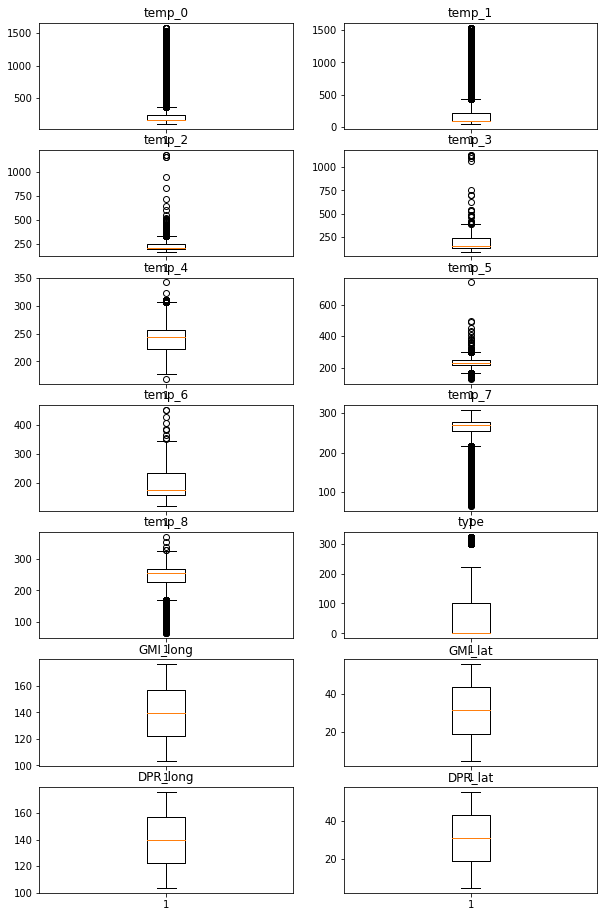

In [25]:
fig = plt.figure(figsize=(10, 16)) 
gs = gridspec.GridSpec(nrows=7,
                       ncols=2, 
                       height_ratios=[1, 1, 1, 1, 1, 1, 1],
                       width_ratios=[1,1])


for i, col in enumerate(columns[:-1]):
    ax = plt.subplot(gs[i])
    ax.boxplot(data[col])
    ax.set_title(col)

# plt.subplots_adjust(wspace=2, hspace=2)
plt.show()

In [6]:
data = data[data['temp_2'] < 750]
data = data[data['temp_3'] < 900]
data = data[data['temp_5'] < 600]

print(data.shape)

(121608234, 15)


In [7]:
data = np.array(data)
print(data.shape)

(121608234, 15)


In [8]:
np.save(os.path.join(data_path, 'EDA.npy'), data)

# Scatter

In [ ]:
fig = plt.figure(figsize=(16, 16)) 
gs = gridspec.GridSpec(nrows=5,
                       ncols=2, 
                       height_ratios=[1, 1, 1, 1, 1],
                       width_ratios=[1,1])


for i, col in enumerate([f"temp_{i}" for i in range(9)]):
    ax = plt.subplot(gs[i])
    ax.scatter(col, 'precipitation', data=data)
    ax.set_title(col)

# plt.subplots_adjust(wspace=2, hspace=2)
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000013AD8E009D8> (for post_execute):


KeyboardInterrupt: 

# select K

In [11]:
selectKs = list()
features = list()

for i in [7, 8]:
    selectK = SelectKBest(score_func=f_regression, k=i)
    selectK.fit(X, Y)

    print(f"{i:2} : {selectK.get_support()}")
    
    features.append(selectK.get_support())
    selectKs.append(selectK)

 7 : [False False  True  True  True  True  True  True False False False False
 False  True]
 8 : [False False  True  True  True  True  True  True False False False  True
 False  True]
